In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
data_1 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 35 CSV.csv", encoding='latin-1')
data_2 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 37 CSV.csv", encoding='latin-1')
data_3 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 38 CSV.csv", encoding='latin-1')
data_4 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 39 CSV.csv", encoding='latin-1')
data = data_1.append(data_2, ignore_index=True)
data = data.append(data_3, ignore_index=True)
data = data.append(data_4, ignore_index=True)
data.head()

,date,name,currency,language,name2,name3,ageGroup,articleId,colors,colorGroup,...,ped,pid,sportsCategory,subBrand,technologies,type,url,price,territories,type5
0,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,011040,Black/Footwear White,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/world-cup-fussballschuh/...,NaN,NaN,NaN
1,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,015110,Black/Footwear White/Black,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/copa-mundial-fussballsch...,NaN,NaN,NaN
2,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019000,Black/Footwear White,schwarz,...,NaN,04/18/2013,Freizeit,Performance,EVA,NaN,https://www.adidas.de/samba-leather-schuh/0190...,NaN,NaN,NaN
3,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019099,Black/White,schwarz,...,NaN,01/28/2015,Freizeit,Sport inspired,EVA,NaN,https://www.adidas.de/samba-super-schuh/019099...,NaN,NaN,NaN
4,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019228,Black/Footwear White/Red,schwarz,...,NaN,04/18/2013,Fußball,Performance,TRAXION|EVA,NaN,https://www.adidas.de/mundial-team-fussballsch...,NaN,NaN,NaN


In [4]:
data.isnull().sum()

date                    0
name                    0
currency                0
language                0
name2                   0
name3                 368
ageGroup            10309
articleId             368
colors              10045
colorGroup          37566
consumerRating        368
currentPrice          368
description          5033
discountedSince    277723
division              368
gender              11363
group               76709
imageUrl              404
initialPrice          368
modelNumber           368
name4                 371
ped                416727
pid                   368
sportsCategory      88758
subBrand            93557
technologies       281645
type               274499
url                   368
price              439691
territories        439691
type5              439691
dtype: int64

In [5]:
data.language.unique()

array(['de-DE', 'en-US', 'en-GB'], dtype=object)

In [6]:
data.subBrand.unique()

array(['Performance', 'Sport inspired', 'adidas by Stella McCartney',
       'Essentials', nan, 'Porsche Design Sport by adidas',
       'Sport Inspired', 'sport inspired', 'Sport', 'performance',
       'adidas by stella mccartney', 'porsche design sport by adidas',
       'essentials', 'adidas neo', 'Sportswear', 'Jordan', 'Collections',
       'UAS', 'Hurley'], dtype=object)

In [7]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [8]:
#data.group.unique()

In [9]:
data_req = data.loc[:,["name", "description", "division","sportsCategory", "subBrand", "group", "name2", "name3", "name4", "url"]]

In [10]:
data_req = data_req.drop_duplicates()

In [11]:
len(data_req)

158140

In [12]:
data_req_x = data_req.loc[:,["name", "description", "division", "group", "name2", "name3", "name4", "sportsCategory", "url"]]
data_req_y = data_req.loc[:, ["subBrand"]]

In [13]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [14]:
len(data_req)

158140

In [15]:
data_req = data_req.dropna()

In [16]:
data_req = data_req.drop_duplicates()

In [17]:
data_req["description"]  = data_req["name"] +" " + data_req["description"] +" " + data_req["division"] +" " + data_req["group"] +" " + data_req["name2"]+" " + data_req["name3"]+" " + data_req["name4"]+" " + data_req["sportsCategory"]+" " + data_req["url"]

In [18]:
data_req = data_req.drop(["name", "division", "group", "name2", "name3", "name4", "sportsCategory","url"], axis = 1)

In [19]:
data_req.columns = ["description", "subBrand"]

In [20]:
data_req.subBrand.unique()

array(['Performance', 'Sport inspired', 'adidas by Stella McCartney',
       'Essentials', 'Porsche Design Sport by adidas', 'Sport Inspired',
       'sport inspired', 'Sport', 'performance',
       'adidas by stella mccartney', 'porsche design sport by adidas',
       'essentials', 'adidas neo', 'Sportswear', 'Jordan', 'Collections',
       'UAS', 'Hurley'], dtype=object)

In [21]:
len(data_req)

126936

In [22]:
data_req = data_req.drop_duplicates()

In [23]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [24]:
data_req.subBrand.unique()

array(['performance', 'sport inspired', 'adidas by stella mccartney',
       'essentials', 'porsche design sport by adidas', 'sport',
       'adidas neo', 'sportswear', 'jordan', 'collections', 'uas',
       'hurley'], dtype=object)

In [25]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(518.8765913531229, 252.36651660960243, 3580)

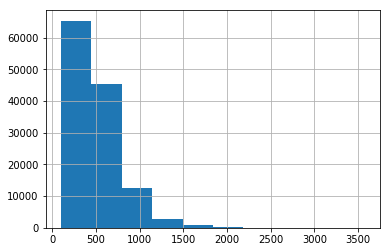

In [26]:
lens.hist();

In [27]:
data_req = data_req.dropna()

In [28]:
len(data_req)

126936

In [29]:
one_hot = pd.get_dummies(data_req.subBrand)

In [30]:
label_cols = data_req.subBrand.dropna().unique()

In [31]:
label_cols

array(['performance', 'sport inspired', 'adidas by stella mccartney',
       'essentials', 'porsche design sport by adidas', 'sport',
       'adidas neo', 'sportswear', 'jordan', 'collections', 'uas',
       'hurley'], dtype=object)

In [32]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [33]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [34]:
subBrand_drop

,index,subBrand
10,porsche design sport by adidas,False
11,adidas neo,False


In [35]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [36]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [37]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [38]:
description = "description"

In [39]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [40]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [41]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [42]:
test_subBrand = test.subBrand

In [43]:
#test_subBrand

In [44]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [45]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [45]:
from stop_words import get_stop_words
stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [47]:
#stop_words_english.append(stop_words_german)

In [46]:
stop_words_english

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [48]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [49]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [50]:
trn_term_doc, test_term_doc

(<88855x252305 sparse matrix of type '<class 'numpy.float64'>'
 	with 13549180 stored elements in Compressed Sparse Row format>,
 <38081x252305 sparse matrix of type '<class 'numpy.float64'>'
 	with 5750630 stored elements in Compressed Sparse Row format>)

In [51]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [52]:
x = trn_term_doc
test_x = test_term_doc

In [53]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit adidas by stella mccartney
fit collections
fit essentials
fit hurley
fit jordan
fit performance
fit sport
fit sport inspired
fit sportswear
fit uas


In [56]:
preds.shape

(38081, 10)

In [57]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [58]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [59]:
len(test)

38081

In [60]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [61]:
submission.head()

,description,adidas by stella mccartney,collections,essentials,hurley,jordan,performance,sport,sport inspired,sportswear,uas
0,adidas dieser klassische fußballschuh überzeug...,0.000120,0.000035,0.000419,0.000045,0.000039,0.995774,0.000442,0.002308,0.000041,0.000032
1,adidas hier wird einem legendären fußballschuh...,0.000092,0.000036,0.000403,0.000043,0.000044,0.010879,0.000352,0.970477,0.000049,0.000033
2,adidas ein fußballschuh mit tf-sohle und klass...,0.000099,0.000035,0.000567,0.000045,0.000042,0.881463,0.000294,0.160599,0.000039,0.000034
3,adidas ein fußballklassiker feiert sein reviva...,0.000097,0.000035,0.000361,0.000045,0.000032,0.994235,0.000304,0.004717,0.000046,0.000033
4,adidas dieser basketball begleitet dich das ga...,0.000120,0.000036,0.000745,0.000052,0.000035,0.923945,0.000783,0.047888,0.000041,0.000036


In [62]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [63]:
test_subBrand.str.lower().value_counts()

performance                       29177
sport inspired                     5973
sport                              1979
hurley                              329
essentials                          247
collections                         149
adidas by stella mccartney          144
jordan                               40
uas                                  24
sportswear                           18
porsche design sport by adidas        1
Name: subBrand, dtype: int64

In [64]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [65]:
# from mlxtend.evaluate import confusion_matrix

# y_target =    final_pred.subBrand
# y_predicted = final_pred.Predictions

# cm = confusion_matrix(y_target=y_target, 
#                       y_predicted=y_predicted, 
#                       binary=False)

In [66]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
# import numpy as np

# fig, ax = plot_confusion_matrix(conf_mat=cm)
# plt.show()

In [69]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.9685407421023607


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.7745528892275856
Precision: 0.8073667616518189
Recall: 0.7546675176211551


In [68]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()